# <center><font color=navy> Machine Learning from Theory to Practice</font></center>
## <center><font color=navy> Gradient Descent Algorithm</font> </center>
### <center> Ali Habibnia</center>

    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
<center> habibnia@vt.edu </center> 


<div class="alert alert-block alert-info">


Gradient descent, also known as **steepest descent**, is an iterative optimization algorithm for finding a ***local*** minimum of differentiable objective functions. At each iteration, gradient descent operates by moving the current solution in the direction of the negative gradient of the function (the direction of "steepest descent").

<img src="images/error.jpg"  width="500">

> What is gradient? 
- “A gradient measures how much the output of a function changes if you change the inputs a little bit.” — Lex Fridman (MIT)
- You can also think of a gradient as the slope of a function. 
- Said it more mathematically, a gradient is a partial derivative with respect to its inputs.




See [Gradient: definition and properties](https://ocw.mit.edu/courses/mathematics/18-02sc-multivariable-calculus-fall-2010/2.-partial-derivatives/part-b-chain-rule-gradient-and-directional-derivatives/session-35-gradient-definition-perpendicular-to-level-curves/)

</div>




### Optimization 

Optimization refers to the task of minimizing/maximizing an objective function f(x) parameterized by x.

***There are three kinds of optimization algorithms:***

- Optimization algorithm that is not iterative and simply solves for one point.
- Optimization algorithm that is iterative in nature and converges to acceptable solution regardless of the parameters initialization such as gradient descent applied to logistic regression.
- Optimization algorithm that is iterative in nature and applied to a set of problems that have non-convex cost functions such as neural networks. Therefore, parameters’ initialization plays a critical role in speeding up convergence and achieving lower error rates.


### Why Gradient Descent? 

- Gradient descent is by far the most popular optimization strategy, used in machine learning. 
- It can be combined with every algorithm and is easy to understand and implement.
- It is an optimization algorithm, based on a convex function, that tweaks it’s parameters iteratively to minimize a given function to its local minimum.
- It is simply used to find the values of a functions parameters (coefficients) that minimize a loss/cost function as far as possible.
- It is a first-order optimization algorithm. This means it only takes into account the first derivative when performing the updates on the parameters. 

> You start by defining the initial parameters values and from there on Gradient Descent iteratively adjusts the values, using calculus, so that they minimize the given loss function. On each iteration, we update the parameters in the opposite direction of the gradient of the objective function w.r.t the parameters where the gradient gives the direction of the steepest ascent. 

— — — — — — — — — — — — — 

**Forward propagation**
1. Initialise parameters (one-time)
2. Feed data
3. Compute ŷ
4. Compute loss

**Backpropagation**
5. Compute partial differentials
6. Update parameters

 — — — — — — — — — — — — —

Repeat until convergence

<img src="images/update_rule.png"  width="300">



> When Gradient Descent can’t decrease the cost-function anymore and remains more or less on the same level, we say it has converged.



### Multivariable Calculus Review
We will be covering some of the most relevant concepts from multivariable calculus for this lecture, and show how they can be extended to deal with matrices of training data.

### Partial Derivatives
The derivative of a function of 2 variables $f(x, y)$ w.r.t. either one of its variables is defined as 

$$
\begin{aligned}
\frac{\partial}{\partial x} f(x, y) &:= \lim_{h \to 0} \frac{f(x + h, y) - f(x, y)}{h}\\
\frac{\partial}{\partial y} f(x, y) &:= \lim_{h \to 0} \frac{f(x, y + h) - f(x, y)}{h}
\end{aligned}
$$

---
### Directional Derivatives
Before we define the gradient, we discuss the closely related concept of a directional derivative.

The directional derivative of a function $f(x, y)$ at $(x_0, y_0)$ moving in the direction of a unit vector $u = [a, b]$ is 

$$
\begin{aligned}
D_{u} f(x_0, y_0) := \lim_{h \to 0} \frac{f(x_0 + ha, y_0 + hb) - f(x_0, y_0)}{h}
\end{aligned}
$$

This simply tells us how the scalar output of $f$ will change when we move in an arbitrary direction that is not necesarily axis-aligned. It can be written as 

$$
\begin{aligned}
D_{u} f(x, y) = \left[\frac{\partial}{\partial x} f(x, y), \frac{\partial}{\partial y} f(x, y)\right] \cdot u
\end{aligned}
$$

---
### Gradient
This is perhaps the term you will hear most often in the context of neural networks. The gradient is informally defined as the vector pointing in the direction of steepest increase for a given function. Thus, if we would like to minimize a loss function such as mean squared error (MSE), we move in the opposite direction of the gradient, i.e. in the direction of the negative gradient.

Now the gradient is simply defined as 

$$
\begin{aligned}
\nabla f(x, y) := \left[\frac{\partial}{\partial x} f(x, y), \frac{\partial}{\partial y} f(x, y)\right]
\end{aligned}
$$

Note that this is a vector-field (vector-valued function), and not a scalar-valued function!

### Gradient Descent

#### Introduction

Gradient descent is an algorithm used to the find local minimums of any differentiable function. More formally, given a differentiable function $f(x),$ the gradient descent algorithms helps us compute $x^*$ such that $f'(x^*) = 0$ and $x^*$ is a minimum of $f(x).$ A function can have many local minimums $x_{1}^{*}, x_{2}^{*}, \ldots, x_{k}^{*},$ the gradient descent algorithm will converge to one of them depending on the its starting position and learning rate (discussed below). 

The name "Gradient Descent" hints at how this algorithm works. The algorithms requires 1) knowing the $\textbf{gradient}$ (partial derivatives) of the function and 2) using the gradient to determine the direction of steepest $\textbf{descent}.$ The idea is that we will begin somewhere on the function, for example $f(x_{1})$, and then climb down the function as quickly as possible towards the first valley (local minimum) where $f'(x^*) = 0.$ The gradient descent algorithm essentially describes the sequence of steps to take to go from $x_{1}$ to a local minimum $x^*.$

Gradient descent (or a variation) is very commonly used to train machine learning models by minimizing some objective function. Many of the objective functions in machine learning are hard to minimize analytically, but we can approximate the minimum using gradient descent. 

#### Algorithm intuition

Suppose we have a single variable function $f(x)$ that has a single global minimum (for example a parabola that opens upwards) at $x^*.$ Our goal is to approximate $x^*$ through an itterative algorithm. The first step is to pick a starting point (initial value) for the algorithm, $x_{1}.$ We will randomly guess $x_{1}$ and note that either $x_{1} < x^*$, or $x_{1} > x^*$ (we can get really lucky and have $x_{1} = x^*,$ but this is very unlikely). Since $x^*$ is the global minimum, we know that $f(x^*) < f(x_{1}),$ that is our starting point is above the minimum. Starting at $x_{1}$ we want to take a sequence of steps to get down to $x^*.$ The gradient descent algorithm characterizes the set of steps to take to get from $x_{1}$ down to $x^*.$

Without loss of generality assume our starting position $x_{1} < x^*,$ and let us discuss how to get down towards $x^*.$ Recall that we can compute the gradient of $f(x)$ since we assume the function is differentiable. Suppose we find $f'(x_{1}) < 0,$ that indicates that if we take a step right to $x_{2} > x_{1}$ then we will move down the function since $f(x_{2}) < f(x_{1}).$ This is exactly what we want (moving down the function), so we want to take a step to the right of $x_{1}.$ But how large of a step should we take? Well it makes sense to say the step size will depend on the steepness of the descent. The steeper the descent at $x_{1}$, the larger the step size should be as it indicates we have a long way to go before getting to the minimum. More formally the step size will be proportional to the gradient at $x_{1}.$

Once we get from $x_{1}$ to $x_{2}$, we repeat the same logic as above. Suppose $f'(x_2) < 0$ again, so we need to take a step towards $x_{3} > x_{2}$ to further go down the function. Again our step size will be proportional to $f'(x_2).$ Repeating this process will result in a sequence of steps $x_{1}, x_{2}, \ldots, x_{T}.$ For large values of $T$ we expect $x_{T} \approx x^*.$ The diagram below more formally describes the intuition behind gradient descent.

<img src="images/gradd.jpg"  width="600">

The diagram above formally shows a single step of the gradient descent algorithm from $x_{1}$ to $x_{2}$ To determine $x_{2}$ we take a step to the right of $x_{1}$ that is proportional to $f'(x_{1}).$ Mathematically speaking, the sign of $f'(x_{1})$ indicates the direction of the steepest ascent at $x_{1}$ (magnitude of f'(x_{1}) is measure of steepness), but since we want to descend (its called gradient $\textbf{descent}$) we use $-f'(x_{1}).$ Gradient descent relies on a parameter $\eta$ called the learning rate, let us talk about this more. 

### Thinking about the learning rate

- How big the steps are that Gradient Descent takes into the direction of the local minimum are determined by the so-called learning rate. 
- It determines how fast or slow we will move towards the optimal weights.
- In order for Gradient Descent to reach the local minimum, we have to set the learning rate to an appropriate value, which is neither too low nor too high.
- This is because if the steps it takes are too big, it maybe will not reach the local minimum because it just bounces back and forth between the convex function of gradient descent like you can see on the left side of the image below. 
- If you set the learning rate to a very small value, gradient descent will eventually reach the local minimum but it will maybe take too much time like you can see on the right side of the image.

The learning rate $\eta$ and the steepest descent $-f'(x_{1})$ together determine the step size towards the minimum. Hence the learning rate determines the size of the steps. If $\eta$ is large then we will take large steps down towards to the minimum. Similarly if $\eta$ is small it will take longer to converge towards the minimum as the step size is smaller. Does this mean we should pick a really large $\eta$ to coverge fast towards $x^*?$ No, this is not a good idea. $\eta$ too large or too small can cause covergence problems as illustrated by the diagram below.

<img src="images/learningrate.jpg"  width="600">

Note that $J(w)$ is the function that we want to minimize in the above diagram. On the left figure $\eta$ is very large which leads to taking very big steps. These big steps essentially have trouble locating the minimum because they are jumping over it. On the right figure $\eta$ is very small leading to tiny steps towards the minimum. The algorithm finds a minimum, but its only a local minimum (global minimum is ideal). For the right figure imagine the step size was a bit larger, then the algorithm could jump over the local minimum and possiblly converge into the global minimum. 

***So how you do pick the best $\eta$? This is often done using "cross validation".***

A good way to make sure that Gradient Descent runs properly is by plotting the cost function as Gradient Descent runs. You put the number of iterations on the x-axes and the value of the cost-function at the y-axes. This enables you to see the value of your cost function after each iteration of gradient descent. 


<img src="images/eta.png"  width="300">



### Examples: 

#### Example by hand:

Find the local minima of the function y=(x+5)² starting from the point x=3

<img src="images/ex1.png"  width="300">

**Solution:** We know the answer just by looking at the graph. y = (x+5)² reaches it’s minimum value when x = -5 (i.e when x=-5, y=0). Hence x=-5 is the local and global minima of the function.


Now, let’s see how to obtain the same numerically using gradient descent.

- Step 1 : Initialize x =3. Then, find the gradient of the function, dy/dx = 2*(x+5).

- Step 2 : Move in the direction of the negative of the gradient. But wait, how much to move? For that, we require a learning rate. Let us assume the learning rate → 0.01

- Step 3 : Let’s perform 2 iterations of gradient descent

<img src="images/ex2.png"  width="500">

- Step 4 : We can observe that the X value is slowly decreasing and should converge to -5. 


In [39]:
# Gradient descent in Python :
# Step 1 : Initialize parameters
cur_x = 3 # The algorithm starts at x=3
rate = 0.01 # Learning rate
precision = 0.00001 #This tells us when to stop the algorithm
previous_step_size = 1 #
max_iters = 10000 # maximum number of iterations
iters = 0 #iteration counter
df = lambda x: 2*(x+5) #Gradient of our function
#  lambda operator or lambda function is used for creating small, one-time and anonymous function objects in Python.

In [40]:
# Step 2 : Run a loop to perform gradient descent :
# Stop loop when difference between x values from 2 consecutive iterations is less than 0.000001 or when number of iterations exceeds 10,000
while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x #Store current x value in prev_x
    cur_x = cur_x - rate * df(prev_x) #Grad descent
    previous_step_size = abs(cur_x - prev_x) #Change in x
    iters = iters+1 #iteration count
    print("Iteration",iters,"\nX value is",cur_x) #Print iterations
    
print("The local minimum occurs at", cur_x)


Iteration 1 
X value is 2.84
Iteration 2 
X value is 2.6832
Iteration 3 
X value is 2.529536
Iteration 4 
X value is 2.37894528
Iteration 5 
X value is 2.2313663744
Iteration 6 
X value is 2.0867390469119997
Iteration 7 
X value is 1.9450042659737599
Iteration 8 
X value is 1.8061041806542846
Iteration 9 
X value is 1.669982097041199
Iteration 10 
X value is 1.5365824551003748
Iteration 11 
X value is 1.4058508059983674
Iteration 12 
X value is 1.2777337898784
Iteration 13 
X value is 1.152179114080832
Iteration 14 
X value is 1.0291355317992152
Iteration 15 
X value is 0.9085528211632309
Iteration 16 
X value is 0.7903817647399662
Iteration 17 
X value is 0.6745741294451669
Iteration 18 
X value is 0.5610826468562635
Iteration 19 
X value is 0.44986099391913825
Iteration 20 
X value is 0.3408637740407555
Iteration 21 
X value is 0.23404649855994042
Iteration 22 
X value is 0.1293655685887416
Iteration 23 
X value is 0.026778257216966764
Iteration 24 
X value is -0.07375730792737258
It

X value is -4.99573011458824
Iteration 374 
X value is -4.995815512296476
Iteration 375 
X value is -4.995899202050547
Iteration 376 
X value is -4.995981218009535
Iteration 377 
X value is -4.996061593649345
Iteration 378 
X value is -4.996140361776358
Iteration 379 
X value is -4.996217554540831
Iteration 380 
X value is -4.996293203450014
Iteration 381 
X value is -4.996367339381013
Iteration 382 
X value is -4.996439992593393
Iteration 383 
X value is -4.996511192741525
Iteration 384 
X value is -4.996580968886694
Iteration 385 
X value is -4.99664934950896
Iteration 386 
X value is -4.9967163625187805
Iteration 387 
X value is -4.996782035268405
Iteration 388 
X value is -4.996846394563037
Iteration 389 
X value is -4.996909466671776
Iteration 390 
X value is -4.996971277338341
Iteration 391 
X value is -4.997031851791574
Iteration 392 
X value is -4.997091214755742
Iteration 393 
X value is -4.997149390460628
Iteration 394 
X value is -4.997206402651415
Iteration 395 
X value is 

#### Example with two parameters:

In [42]:
# For the following function: 
# y = x**2 + z**2 - 2x + 2
# def y(x, z):
#   return x**2 + z**2 -2*x + 2

# the partial derivatives are:
# dy/dx = 2x -2
# dy/dz = 2z

# the following function runs gradient descent for 40 iterations specifically for this example, with an initial guess of x = 4, z = 4 and a learning rate (alpha) of 0.1

# The algorithm converges on the minimum within 39 iterations

def gradient_descent(x=4, z = 4, alpha=0.01):
  for i in range(500):
    # the step is alpha * dy/dx
    step_x = alpha * (2*x - 2)
    step_z = alpha * 2*z
    print("iteration: {}, x: {:.2f}, step_x: -{:.2f}, z: {:.2f}, step_z: -{:.2f}".format(i, x, step_x, z, step_z))
    # we move x down the slope by moving in the opposite direction to the gradient
    x = x - step_x
    z = z - step_z

gradient_descent(4, 4)

iteration: 0, x: 4.00, step_x: -0.06, z: 4.00, step_z: -0.08
iteration: 1, x: 3.94, step_x: -0.06, z: 3.92, step_z: -0.08
iteration: 2, x: 3.88, step_x: -0.06, z: 3.84, step_z: -0.08
iteration: 3, x: 3.82, step_x: -0.06, z: 3.76, step_z: -0.08
iteration: 4, x: 3.77, step_x: -0.06, z: 3.69, step_z: -0.07
iteration: 5, x: 3.71, step_x: -0.05, z: 3.62, step_z: -0.07
iteration: 6, x: 3.66, step_x: -0.05, z: 3.54, step_z: -0.07
iteration: 7, x: 3.60, step_x: -0.05, z: 3.47, step_z: -0.07
iteration: 8, x: 3.55, step_x: -0.05, z: 3.40, step_z: -0.07
iteration: 9, x: 3.50, step_x: -0.05, z: 3.33, step_z: -0.07
iteration: 10, x: 3.45, step_x: -0.05, z: 3.27, step_z: -0.07
iteration: 11, x: 3.40, step_x: -0.05, z: 3.20, step_z: -0.06
iteration: 12, x: 3.35, step_x: -0.05, z: 3.14, step_z: -0.06
iteration: 13, x: 3.31, step_x: -0.05, z: 3.08, step_z: -0.06
iteration: 14, x: 3.26, step_x: -0.05, z: 3.01, step_z: -0.06
iteration: 15, x: 3.22, step_x: -0.04, z: 2.95, step_z: -0.06
iteration: 16, x: 

### Linear Regression using Gradient Descent

Let’s apply the things learnt above on linear regression problem. Here’s a recap of linear regression:


Our model is $y(x) = wx + b$. Parameters are $v = (w, b)$
We are given training pairs $(x^1, y^1), (x^2, y^2), \ldots, (x^n, y^n)$.

We want to find $w$ and $b$ which minimize the following 
cost/loss function:

$$
C(w, b) = \frac{1}{n} \sum_{i = 1}^{n} C_i(w, b) = \frac{1}{2n} \sum_{i = 1}^{n} \| y(x^i) - y^i\|^2
$$

where
$C_i(w, b) = \frac{1}{2} | y(x^i) - y^i|^2 = \frac{1}{2} | wx^i + b - y^i|^2$ is the loss of the model for $i$ th training pair.


<p>Let’s calculate gradients,</p>

$$
\nabla C = \frac{1}{n} \sum_{i = 1}^{n} \nabla C_i
$$

where $\nabla C_i$ is computed using:

$$
\nabla C_i = \left( \frac{\partial C_i}{\partial w}, \frac{\partial C_i}{\partial b}  \right) = \left( (wx^i + b - y^i)x^i, (wx^i + b - y^i) \right)
$$

Update rule is

$$v \rightarrow v' = v -\eta \nabla C = v -\frac{\eta}{n} \sum_{i = 1}^{n} \nabla C_i$$




Here $\eta$ is called *learning rate*. If it is too small, algorithm can be very slow and might take too many iterations to converge. If it is too large, algorithm might not even converge.

![alt text](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

***See:*** How to Implement Linear Regression With Gradient Descent and Stochastic Gradient Descent From Scratch With Python

https://github.com/chasinginfinity/ml-from-scratch/blob/master/02%20Linear%20Regression%20using%20Gradient%20Descent/Linear%20Regression%20using%20Gradient%20Descent.ipynb

https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/


### More Examples:

#### Single variable

Suppose we have a single variable and differentiable function $f(x).$ Given a initial value $x_{1}$ the gradient descent describes the steps required to coverge towards a local minimum $x^*$ such that $f'(x^*) = 0.$ In the above section we determined that $x_{2} = x_{1} - \lambda f'(x_{1}),$ where $\lambda$ is the learning rate parameter. This formula can be generalized to $$x_{t+1} = x_{t} - \lambda f'(x_{t}),$$ for itteration $t.$ Given initial value $x_{1}$ and large number of itterations $T,$ this algorithm will generate $x_{1}, x_{2}, \ldots, x_{T},$ where $x_{T} \approx x^*.$ That is $x_{t+1}$ converges towards $x^*$ as $t$ gets very large. Notice that at convergence $f'(x_{t}) \approx 0$ and hence $|x_{t+1} - x_{t}| \approx 0.$ Therefore a common stopping criteria for gradience descent is to itterate until $|x_{t+1} - x_{t}|$ is a very small number. For example we can keep itterating gradient descent until $|x_{t+1} - x_{t}| < 0.001.$

#### Multiple variables
Consider a multiple variable and differentiable function $f(x_{1},x_{2},\ldots, x_{n}).$ Our goal is to apply gradient descent and find a minimum $(x_{1}^{*}, x_{2}^{*}, \ldots, x_{n}^{*}).$ This function has partial derivatives stored in the gradient vector $(\frac{df(x)}{dx_{1}}, \ldots, \frac{df(x)}{dx_{n}}).$ The direction of the gradient vector indicates direction of steepest ascent, and the length of the gradient vector is a mesuare of the steepness. We can easily generalize the gradient descent to multiple variables as follows:


$$
\begin{bmatrix}
    x_{1}^{t+1} \\ 
    \vdots \\
    x_{n}^{t+1}
\end{bmatrix}
=
\begin{bmatrix}
    x_{1}^{t} \\ 
    \vdots \\
    x_{n}^{t}
\end{bmatrix}
-
\lambda
\begin{bmatrix}
    \frac{df(x_{1})}{dx_{1,t}} \\ 
    \vdots \\
    \frac{df(x_{n})}{dx_{n,t}} \\ 
\end{bmatrix},
$$
where $t$ is the gradient descent itteration. Now the stopping criteria can depend on the euclidean distance between the now and previous itteration, that is stop if $\sqrt{(x_{1}^{t+1} - x_{1}^{t})^2 + \ldots + (x_{n}^{t+1} - x_{n}^{t})^2} < 0.001.$

#### Example: Minimizing single variable function

Consider the following single variable function $$f(x) = 0.1x^2 + sin(0.1x^2)$$ and suppose we find its minimum using gradient descent. Gradient descent requires us to compute the first derivative which is $$f'(x) = 0.2x + 0.2xcos(0.1x^2).$$ The plot for f(x) is shown below.

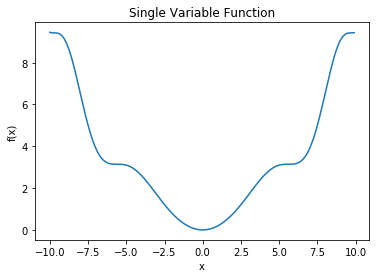

In [18]:
# Matrix computations
from numpy import *

# Plotting
from matplotlib.pyplot import *

# Change size of figures
#fig_size = [9,7]
#rcParams["figure.figsize"] = fig_size

# Define function f(x)
def f(x):
    
    # f(x) = 0.1x^2 + sin(0.1x^2)
    return 0.1*x**2 + sin(0.1*x**2)

# Plot function on given range
# Second arguments allows for seperate points to be ploted on f(x)
def plotf(x, xdots, label):

    # Compute y-values
    y = f(x)

    # Plot (x, f(x))
    plot(x,y)
    xlabel("x")
    ylabel("f(x)")
    title(label)
    
    # Plot points on f(x)
    plot(xdots, f(xdots), 'bo')
    show()
    
# Plot f(x) from [-10,10]
x = arange(-10, 10, 0.1)
plotf(x, np.array([]), "Single Variable Function")

Notice that f(x) has a global minimum at x = 0, but there are also seem to be two local minimums near -5.5 and 5.5. Ideally we want to be able to start anywhere from [-10,10] and use gradient descent to go down towards the minimum of 0. We will see that finding the global minimum depends on initial starting point and learning rate. 

In [43]:
# Derivative of f(x) is f'(x) (denoted by df below)
# f'(x) = 0.2x + 0.2xcos(0.1x^2)
def df(x):
    return 0.2*x + 0.2*x*cos(0.1*(x**2))

Now that we have defined f(x) and f'(x), let us run gradient descent for different initial values and learning parameters and try to compute the global minimum. 

In [47]:
# Gradient descent for single variable
# Depends on f(x), f'(x), x_1, and lambda
def grad_descent(df,x_prev,learn_rate, sequence):

    # Epsilon threshold 
    epsilon = 0.1
    
    # Itterations number
    grad_itter = 1

    # First itteration of gradient descent
    x_next = x_prev - learn_rate*df(x_prev)
    
    # Save first itteration
    sequence = np.append(sequence, x_next)

    # while abs(x_{t+1} - x_{t}) > threshold, keep itterating gradient descent
    while abs(x_next - x_prev) > epsilon:

        # Update x_{t}
        x_prev = x_next

        # Gradient descent step
        # Set new x_{t+1} = x_{t} - lambda*f'(x_{t})
        x_next = x_prev - learn_rate*df(x_prev)
        
        # Save itteration 
        sequence = np.append(sequence, x_next)
        
        # Increment itteration
        grad_itter += 1
        
    # Output converged x_{T}
    return (x_next, sequence, grad_itter)

#### Using ideal learning rate

The example below uses a good learning rate for this context, $\lambda = 1.$ Gradient descent coverges to the global minimum in 20 itterations. 

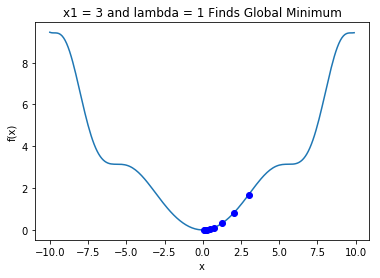

Minimum x-value from gradient descent: 0.09765189469685362
Number of gradient descent itterations: 7


In [50]:
# Output vector (min x-value, (x_1,..,x_T)) from gradient descent
# Initial value x1 = 8 and learn rate lambda = 1
grad_output = grad_descent(df,3,1, np.array([3]))

# Plot including converging sequence on f(x)
plotf(x, grad_output[1], "x1 = 3 and lambda = 1 Finds Global Minimum")

# Print gradient descent solution
print('Minimum x-value from gradient descent: %s' %grad_output[0])
print('Number of gradient descent itterations: %s' %grad_output[2])

#### Using a small learning rate

The example below uses a smaller than ideal learning rate of $\lambda = 0.1.$ Not only does this increase the number of gradient descent itterations to 105, but the algorithm coverges to one of the local minimums. 

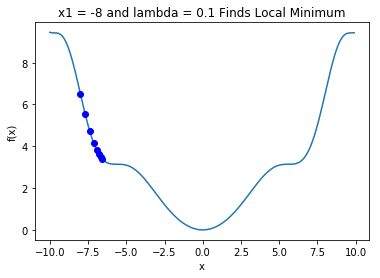

Minimum x-value from gradient descent: -6.56845833092785
Number of gradient descent itterations: 7


In [49]:
# Initial value x1 = 8 and learn rate lambda = 1
grad_output = grad_descent(df,-8,0.1, np.array([-8]))

# Plot including converging sequence on f(x)
plotf(x, grad_output[1], "x1 = -8 and lambda = 0.1 Finds Local Minimum")

# Print gradient descent solution
print('Minimum x-value from gradient descent: %s' %grad_output[0])
print('Number of gradient descent itterations: %s' %grad_output[2])

#### Small learning rate but starting close to global minimum

The example below uses a small learning rate (for this context) of $\lambda = 0.1,$ but starts the algoirthm at $x_{1} = -5.$ The key point is that the initial value is now slight beyond the local minimum. Hence even with a small learning rate we are able to eventually converge to the global minimum.

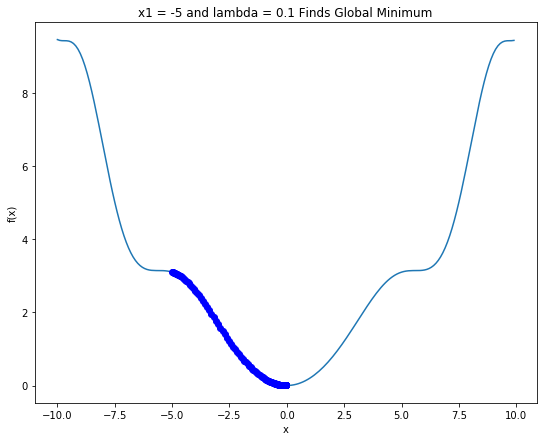

Minimum x-value from gradient descent: -0.0236834514923
Number of gradient descent itterations: 155


In [70]:
# Initial value x1 = 8 and learn rate lambda = 1
grad_output = grad_descent(df,-5,0.1, np.array([-5]))

# Plot including converging sequence on f(x)
plotf(x, grad_output[1], "x1 = -5 and lambda = 0.1 Finds Global Minimum")

# Print gradient descent solution
print('Minimum x-value from gradient descent: %s' %grad_output[0])
print('Number of gradient descent itterations: %s' %grad_output[2])

#### Initial value and learning rate are important

From the above exercises of changing the initial value and learning rate we can conclude that gradient descent is not guranteed to converge to the global minimum. Having a really low learning rate can make convergence slower (more itterations before finding minimum) and make it more likely to get stuck at local minimums. A very high learning rate may be even more problematic as gradient descent may never coverge (try $\lambda$ = 6 in the code). The initial value is also important for finding the global minimum. If we start close to the global minimum, we are more likely to find it in the above example even with a smaller than ideal learning rate.

The diagram below shows even with multiple variables different initial values can lead to different local minimums from gradient descent.

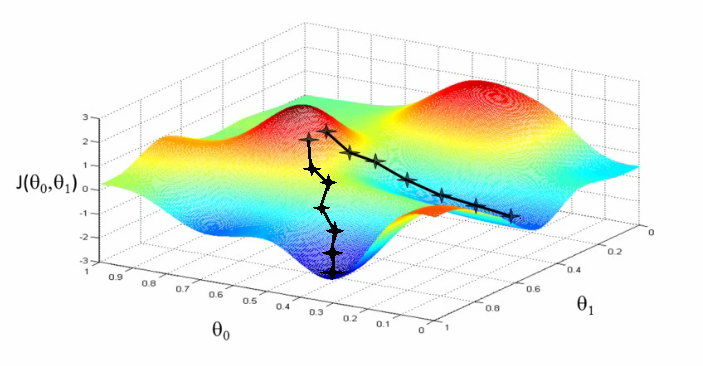

In [71]:
from IPython.display import Image, display
display(Image(filename='GradDescentMult.png', embed=True))

### Example: Minimizing multiple variable function

Let us consider the following straight forward bivariate function $$f(x,y) = x^2 + y^2 + 1.$$ Since this a function of two variables, we have have the following partial derivatives $$\frac{df(x)}{dx} = f_{x} = 2x \text{ and } \frac{df(y)}{dy} = f_{y} = 2y.$$ Note that its easy to argue that the global minimum of $f(x,y)$ is (0,0) since $f(0,0) = 1$ and $f(x,y) \ge 1.$


#### Plotting f(x,y) in 3D

The 3D plot for f(x,y) and the corresponding countour plots are shown below. This function is essentially a 3D parabola. 

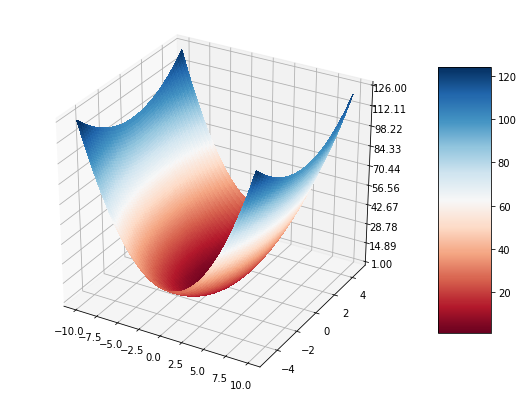

In [72]:
# Plotting in 3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# f(x,y) = x^2 + y^2 + 1
def f(x,y):
    return x**2 + y**2 + 1

# (X,Y) grid on [-5,5]
y = arange(-5, 5, 0.25)
y = arange(-5, 5, 0.25)
X, Y = meshgrid(x, y)


# z = x^2 + y^2
Z = f(X,Y)

# Plot (X,Y) in 3D
fig = figure(1)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
show()    

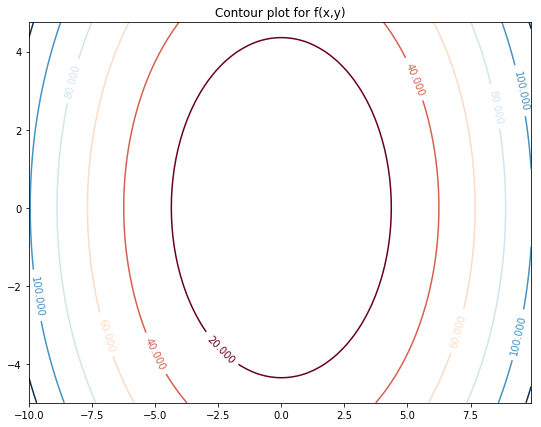

In [73]:
# Function for contour plot with points on it
def contour_plot(x_seq,y_seq, x1):

    # Contour plots for f(x,y) = x^2 + y^2 + 1
    figure(1)
    CS = contour(X, Y, Z, cmap=cm.RdBu)
    clabel(CS, inline=1, fontsize=10)
    
    # Initial point
    plot(x1[0],x1[1],'ro')
    
    # Sequence of points from gradient descent itterations
    plot(x_seq,y_seq,'ro')
    title('Contour plot for f(x,y)')
    show()

# Contour plot with no points
contour_plot([],[],[[],[]])

### Finding global minimum using gradient descent

For this example the gradient descent algorithm is simplified to

$$
\begin{bmatrix}
    x^{t+1} \\ 
    y^{t+1}
\end{bmatrix}
=
\begin{bmatrix}
    x^{t} \\ 
    y^{t}
\end{bmatrix}
-
\lambda
\begin{bmatrix}
    2x^{t} \\ 
    2y^{t} \\ 
\end{bmatrix},
$$

where $t$ is the gradient descent itteration. 

In [74]:
# Partial derivatives

# df/dx = 2x
def dfdx(x,y):
    return 2*x

# df/dy = 2y
def dfdy(x,y):
    return 2*y

# Gradient vector [df/dx, df/dy]
def grad_vector(x,y):
    return np.array([dfdx(x,y), dfdy(x,y)])  

In [75]:
# Gradient descent for multiple variable
def grad_descent_mult(df,x_prev,learn_rate):
    
    # Epsilon threshold 
    epsilon = 0.001
    
    # Itterations number
    grad_itter = 1
    
    # Save itteration 
    seq_x = []
    seq_y = []

    # First itteration of gradient descent
    x_next = np.subtract(x_prev, learn_rate*df(x_prev[0],x_prev[1]))
    
    # Save starting itteration
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    # Itterate until abs(x_{t+1} - x_{t}) < epsilon
    # abs(x_{t+1} - x_{t}) is defined as euclidean distance 
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        
        # Update x_{t}
        x_prev = x_next

        # Gradient descent step
        # Set new x_{t+1} = x_{t} - lambda*[df/dx df/dy]
        x_next = x_prev - learn_rate*df(x_prev[0],x_prev[1])
        
        # Increment itteration
        grad_itter += 1
        
        # Update sequence of itterations
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    # gradient descent output
    return (x_next, grad_itter, seq_x,seq_y)

Minimum (x,y) from gradient descent: [ 0.0010156   0.00033853]
Number of gradient descent itterations: 17


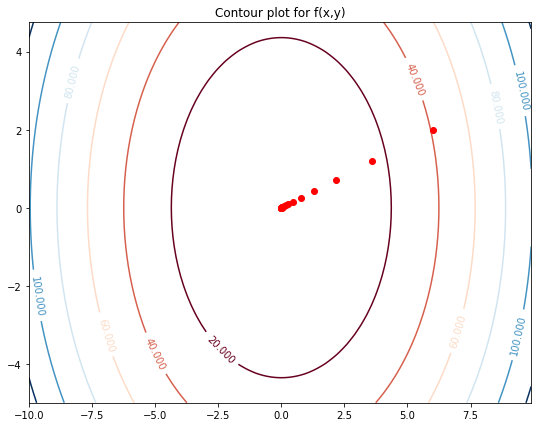

In [76]:
# Gradient desecent with x1 = [6,2] and learn rate lambda = 0.2
grad_output = grad_descent_mult(grad_vector, np.array([6,2]), 0.2)

# Print gradient descent solution
print('Minimum (x,y) from gradient descent: %s' %grad_output[0])
print('Number of gradient descent itterations: %s' %grad_output[1])

# Convergence sequence (x_t,y_t) on contour plot
contour_plot(grad_output[2],grad_output[3], np.array([6,2]))

As expected the gradient descent in multiple variables converges close to the global minimum of (0,0). The contour plot shows the sequence of $(x_t,y_t)$ resulting from gradient descent that coverge to (0,0) from the initial value. Feel free to play around with the initial value and learning rate above. 

## Conclusion

Gradient descent is a first order (requires first derivative) optimization algorithm used to minimize a given objective function. The algorithm depends on the initial value and the learning rate. The idea behind gradient descent is that it takes a seqeuence of steps to go from the starting position to a local minimum. An initial value that is somewhat close to the global minimum is ideal. Too small a learning rate makes it more likely for the algorithm to get stuck at a local minimum. Whereas too high a learning rate makes it more likely that the algorithm will skip over the global minimum. As we discussed in this notebook, the gradient descent can be applied to any first differentiable function (single or multiple variabe) to approximate the minimums (can be local minimums) even if analytical ($f'(x) = 0$ solve for x) solutions are difficult. 

### Gradient Descent — Andrew Ng, Stanford University

In [3]:
from IPython.display import HTML

In [4]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/F6GSRDoB-Cg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

C:\Users\habibnia\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [5]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/YovTqTY-PYY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [6]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/GtSf2T6Co80" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')